In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from clean import MissingFiller, cont_columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from prince import MCA
from clean import MissingFiller, cat_columns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. MCA algorithm

1. convert categorical vars to one-hot-encoded
2. normalize "correspondence" matrix
3. perform SVD - decompose the correspondence matrix X into X = U * Sigma * V', where Sigma is the matrix with the eigenvalues, sorted by size.  
4. Choose the top k eigenvalues, in our case 2
5. Using the V' matrix, we can visualize the similarity of possible values in each category. This is very similar to Figure 3 in the EDA notebook, but this one is linear. 

## 1. Read data

In [5]:
data = pd.read_csv('Automobile_data.csv')
data = MissingFiller().fit_transform(data, _)
data = data[cat_columns]

## 2. Fit model

### 2.1 Explained variance

How much is the explained variance of the first two components? In this case, 20%. 

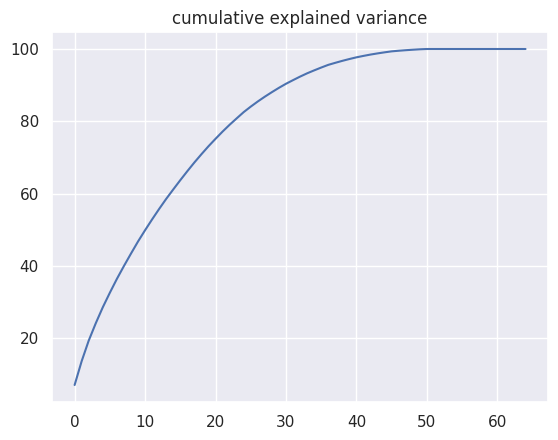

In [42]:
mca = MCA(n_components = 80)
data_mca = mca.fit_transform(data)
plt.plot(mca.cumulative_percentage_of_variance_)
plt.title('cumulative explained variance')
plt.show()

## 2.2 Plot categorical embeddings for make, body-style, symboling

Compare the first plot to Figure 3 from the EDA notebook. 

In [6]:
mca = MCA()
data_mca = mca.fit_transform(data)

In [7]:
category_embeddings = mca.column_coordinates(data)

In [29]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x=x, y=y, data=data, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='small', color='grey')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

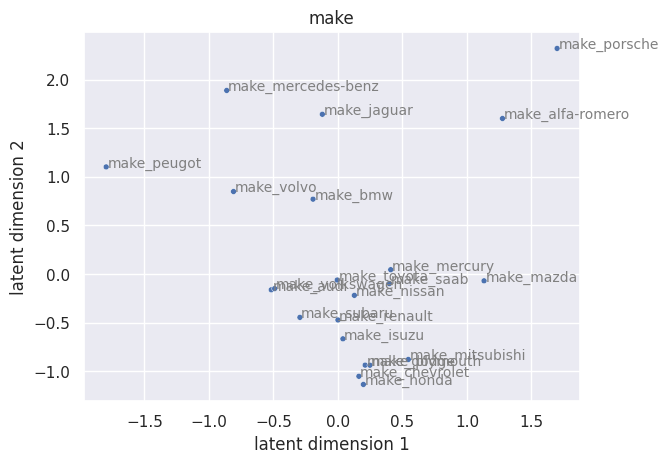

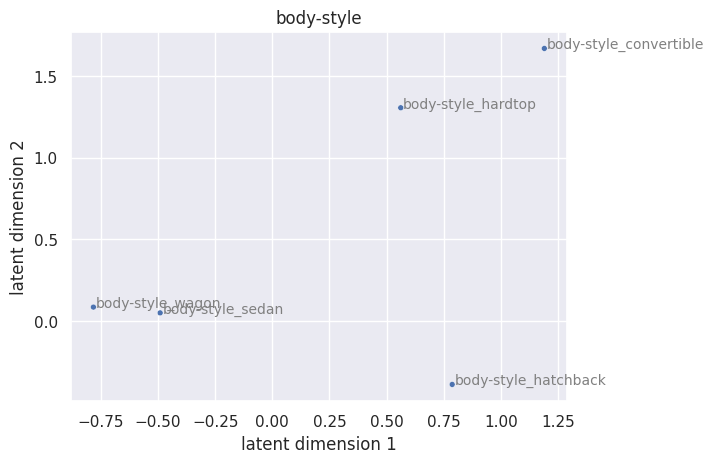

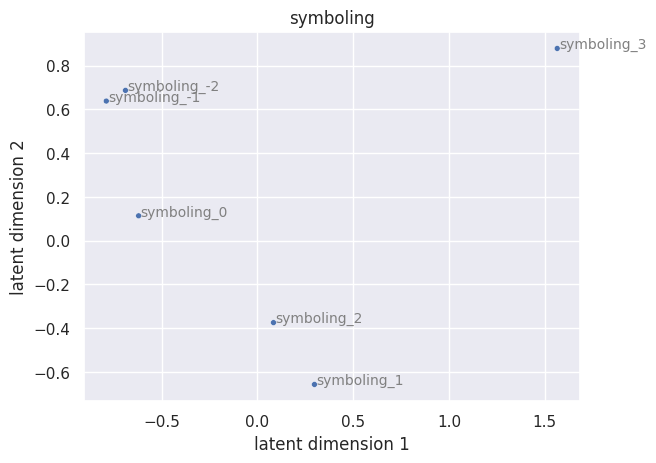

In [43]:
for categorical_var in ['make', 'body-style', 'symboling']:
    embeddings = category_embeddings[category_embeddings.index.str.contains(categorical_var)].reset_index()
    scatter_text(0, 1, 'index', embeddings, categorical_var, 'latent dimension 1', 'latent dimension 2')
    plt.show()